## Import Library

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#202331015_Haidar Rafi Purnomo

## Membaca Data Gambar

In [5]:
img = cv2.imread('hewan.jpg')

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Ketetanggaan Pixel

In [10]:
copyCitra = img.copy().astype(float)

m1,n1 = copyCitra.shape
output1 = np.empty([m1,n1])

print("Shape copyCitra : ", copyCitra.shape)
print("Shape output1 : ", output1.shape)

print('m1 :', m1)
print('n1 :', n1)

#202331015_Haidar Rafi Purnomo

Shape copyCitra :  (1050, 1680)
Shape output1 :  (1050, 1680)
m1 : 1050
n1 : 1680


## Membuat Filter Rata - Rata

In [13]:
for baris in range(1, m1-1):  # PERUBAHAN
    for kolom in range(1, n1-1):  # PERUBAHAN
        a = baris
        b = kolom
        
        jumlah = copyCitra[a-1,b-1] + copyCitra[a-1,b] + copyCitra[a-1,b+1] +\
                 copyCitra[a,b-1] + copyCitra[a,b] + copyCitra[a,b+1] +\
                 copyCitra[a+1,b-1] + copyCitra[a+1,b] + copyCitra[a+1,b+1]
        
        output1[a,b] = 1/9 * jumlah

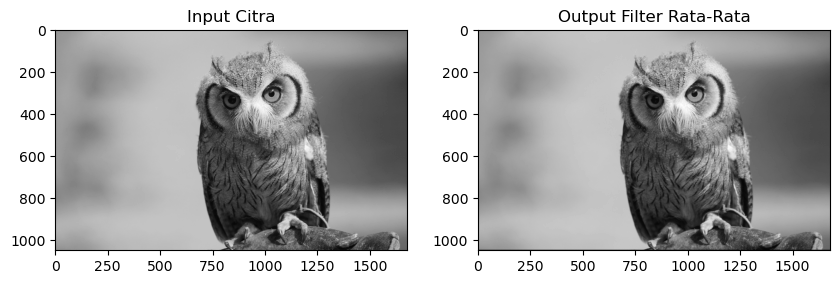

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input Citra')

ax[1].imshow(output1, cmap='gray')
ax[1].set_title('Output Filter Rata-Rata')
plt.show()

#202331015_Haidar Rafi Purnomo

## Membuat fIlter Median


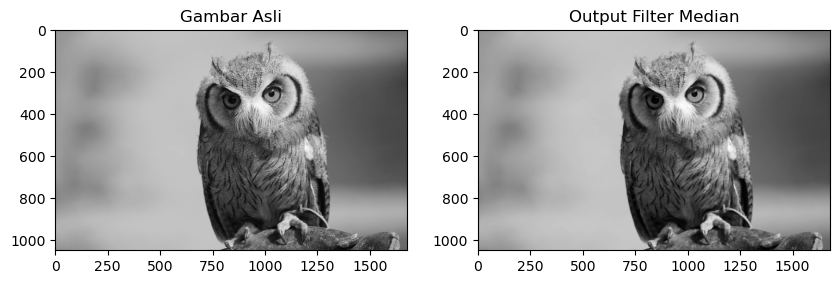

In [18]:
img_median = img.copy()
img_median_after = cv2.medianBlur(img_median, 5)

# Menampilkan hasil filter median
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Gambar Asli')

ax[1].imshow(img_median_after, cmap='gray')
ax[1].set_title('Output Filter Median')
plt.show()

#202331015_Haidar Rafi Purnomo

## Membuat Filter Batas

In [21]:
# Membuat citra batas dengan efek tepi atau batas
img_batas = img.copy().astype(float)  # PERUBAHAN

# Inisialisasi array output untuk batas
output3 = np.empty([m1, n1])

In [23]:
# Proses citra untuk batas
for baris in range(1, m1-1):  # PERUBAHAN
    for kolom in range(1, n1-1):  # PERUBAHAN
        a1 = baris
        b1 = kolom
        
        # Membuat neighborhood 3x3
        arr = np.array([img_batas[a1-1, b1-1], img_batas[a1-1, b1], img_batas[a1-1, b1+1],
                        img_batas[a1, b1-1], img_batas[a1, b1], img_batas[a1, b1+1],
                        img_batas[a1+1, b1-1], img_batas[a1+1, b1], img_batas[a1+1, b1+1]])
        
        minPiksel = np.amin(arr)
        maxPiksel = np.amax(arr)
        
        # Logika pengecekan batas
        if img_batas[a1, b1] < minPiksel:
            output3[a1, b1] = minPiksel
        elif img_batas[a1, b1] > maxPiksel:
            output3[a1, b1] = maxPiksel
        else:
            output3[a1, b1] = img_batas[a1, b1]

#202331015_Haidar Rafi Purnomo

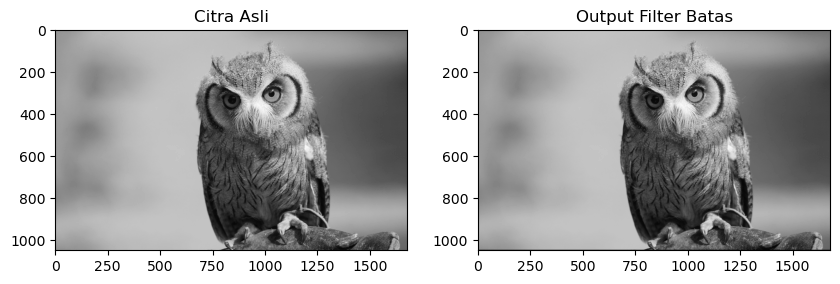

In [25]:
# Menampilkan hasil filter batas
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Citra Asli')

ax[1].imshow(output3, cmap='gray')
ax[1].set_title('Output Filter Batas')
plt.show()

#202331015_Haidar Rafi Purnomo